# Grid Search Parameter Tuning and Pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import HelpfulFunctions as hp

## Supervised Learning PCA: Wisconsin Breast Cancer Dataset

In [3]:
from sklearn.datasets import load_breast_cancer
breastCancerData = load_breast_cancer()
df = pd.DataFrame(breastCancerData['data'],columns = breastCancerData['feature_names'])
y = breastCancerData['target']

### Standardising the Data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [7]:
model = SVC(gamma = "auto")
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[ 63   3]
 [  1 104]]


<Figure size 720x720 with 0 Axes>

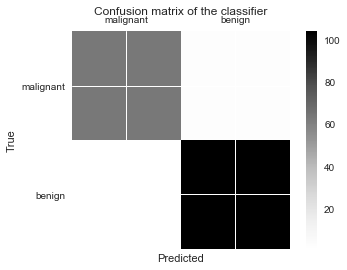

In [8]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
hp.print_cm(cm,['malignant','benign'],plt)

## Using Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
parameters = {'C':[0.01,0.1,1,10], 'gamma':[0.0, 0.000001,0.0001,0.001], 'kernel':['linear','rbf','sigmoid']}

In [11]:
grid = GridSearchCV(SVC(probability = True), parameters, verbose=2) 
grid.fit(X_train,y_train)

C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.01, gamma=0.0, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.0, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.0, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.0, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.0, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.0, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.0, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=sigmoid ...............................
[CV] ..........

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.0, kernel=linear ...................................
[CV] .................... C=1, gamma=0.0, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0, kernel=linear ...................................
[CV] .................... C=1, gamma=0.0, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0, kernel=linear ...................................
[CV] .

[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.0, 1e-06, 0.0001, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [12]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0, 'kernel': 'linear'}

In [13]:
model = SVC(kernel='linear',gamma=1e-5,C=0.1)
model.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[ 62   4]
 [  0 105]]


<Figure size 720x720 with 0 Axes>

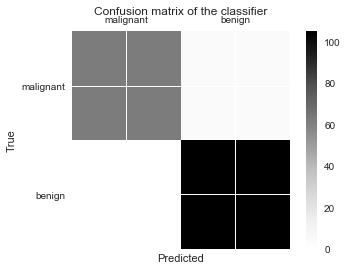

In [14]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
hp.print_cm(cm,['malignant','benign'],plt)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.96      1.00      0.98       105

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



## Using a Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [17]:
pip_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=1, solver='lbfgs'))])

In [18]:
pip_lr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [19]:
print('Test Accuracy: %.3f' %pip_lr.score(X_test, y_test))

Test Accuracy: 0.953
